In [3]:
!pip install networkx
!pip install rdflib
!pip install node2vec

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
Looking in indexes: http://mirrors.aliyun.com/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.0/567.0 kB 26.2 MB/s eta 0:00:00
Looking in indexes: http://mirrors.aliyun.com/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 23.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 97.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 71.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 30.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 41.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3


In [2]:
!pip install pandas==1.5.3

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 99.5 MB/s eta 0:00:00ta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.0/508.0 kB 119.5 MB/s eta 0:00:00
  Created wheel for pandas: filename=pandas-1.5.3-cp312-cp312-linux_x86_64.whl size=11476715 sha256=efe296597cc19757f2d39b2af9ee348fa86f64c6295517afebd61d5fd78b266f
  Stored in directory: /root/.cache/pip/wheels/53/12/10/88a2b83c52a66bb1071c84733a74f0dd3b85dc07b98f95e293
Successfully built pandas


In [5]:
!pip install pykeen==1.11.0

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.4/718.4 kB 9.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 25.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 115.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 96.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 35.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.1/613.1 kB 42.6 MB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd
from rdflib import Graph, Literal, RDF, URIRef, Namespace
import networkx as nx
from node2vec import Node2Vec
from pykeen.triples import TriplesFactory
from pykeen.pipeline import pipeline

In [2]:
csv_file_path = "sample_dataset.csv"
rdf_output_path = "ratings.ttl"
node2vec_output_path = "node2vec_embeddings.vec"
transe_output_path = "transe_model"

In [3]:
def csv_to_rdf(csv_file_path, rdf_output_path):
    data = pd.read_csv(csv_file_path)
    g = Graph()
    EX = Namespace("http://example.org/")
    g.bind("ex", EX)
    
    for _, row in data.iterrows():
        user = URIRef(EX[f"user/{row['User-ID']}"])
        book = URIRef(EX[f"book/{row['ISBN']}"])
        rating = Literal(row['Book-Rating'])
        author = Literal(row['Book-Author'])
        title = Literal(row['Book-Title'])

        g.add((user, RDF.type, EX.User))
        g.add((book, RDF.type, EX.Book))
        g.add((user, EX.rated, book))
        g.add((book, EX.rating, rating))
        g.add((book, EX.author, author))
        g.add((book, EX.title, title))
    
    g.serialize(destination=rdf_output_path, format="turtle")
    return rdf_output_path

In [4]:
def rdf_to_networkx_optimized(rdf_file, chunk_size=1000):
    print(f"Loading RDF file: {rdf_file}")
    g = Graph()
    g.parse(rdf_file, format="turtle")
    
    print("Converting RDF to NetworkX graph...")
    nx_graph = nx.Graph()
    count = 0

    for subj, pred, obj in g:
        nx_graph.add_edge(str(subj), str(obj), relation=str(pred))
        count += 1

        if count % (chunk_size*10000) == 0:
            print(f"Processed {count} triples...")
    
    print(f"Finished converting {count} triples to NetworkX graph.")
    return nx_graph

In [5]:
from torch_geometric.nn import Node2Vec
from torch_geometric.utils import from_networkx
import networkx as nx
import torch

def generate_node2vec_embeddings_torch(nx_graph, output_path, dimensions=32, walk_length=10, num_walks=5, use_gpu=True):
    data = from_networkx(nx_graph)
    device = torch.device('cuda' if torch.cuda.is_available() and use_gpu else 'cpu')
    
    context_size = min(10, walk_length)
    node2vec = Node2Vec(
        edge_index=data.edge_index,
        embedding_dim=dimensions,
        walk_length=walk_length,
        context_size=context_size,
        walks_per_node=num_walks,
        num_negative_samples=1,
        sparse=True
    ).to(device)

    optimizer = torch.optim.SparseAdam(node2vec.parameters(), lr=0.01)

    for epoch in range(1, 101):
        optimizer.zero_grad()
        # Ensure batch tensor is on CPU
        batch = torch.arange(data.num_nodes, device='cpu')  # Force batch to be on CPU
        pos_rw = node2vec.pos_sample(batch)  # Positive random walks
        neg_rw = node2vec.neg_sample(batch)  # Negative random walks
        loss = node2vec.loss(pos_rw.to(device), neg_rw.to(device))  # Compute loss
        loss.backward()
        optimizer.step()
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

    embeddings = node2vec.forward()
    embeddings = embeddings.cpu().detach().numpy()

    with open(output_path, 'w') as f:
        f.write(f"{embeddings.shape[0]} {embeddings.shape[1]}\n")
        for idx, emb in enumerate(embeddings):
            f.write(f"{idx} " + " ".join(map(str, emb)) + "\n")

    return output_path

In [6]:
from pykeen.triples import TriplesFactory
from pykeen.pipeline import pipeline
import numpy as np

def train_transe(rdf_file_path, output_path, num_epochs=100):
    rdf_graph = Graph()
    rdf_graph.parse(rdf_file_path, format="turtle")
    
    triples = [(str(subj), str(pred), str(obj)) for subj, pred, obj in rdf_graph]
    
    triples_array = np.array(triples, dtype=object)
    if triples_array.ndim != 2 or triples_array.shape[1] != 3:
        raise ValueError("Triples must be a 2D array with three columns (head, relation, tail).")
    
    triples_factory = TriplesFactory.from_labeled_triples(triples=triples_array)
    train_factory, test_factory, validation_factory = triples_factory.split([0.8, 0.1, 0.1])
    
    result = pipeline(
        training=train_factory,  
        testing=test_factory,    
        validation=validation_factory,
        model="TransE",
        training_kwargs=dict(num_epochs=num_epochs),
    )
    result.save_to_directory(output_path)
    return output_path

In [17]:
if __name__ == "__main__":
    #print("Converting CSV to RDF...")
    #rdf_file = csv_to_rdf(csv_file_path, rdf_output_path)
    rdf_file = "ratings.ttl"
    #print("Converting RDF to NetworkX graph...")
    nx_graph = rdf_to_networkx_optimized(rdf_file)

Loading RDF file: ratings.ttl
Converting RDF to NetworkX graph...
Finished converting 4536108 triples to NetworkX graph.


In [23]:
print("Generating Node2Vec embeddings...")
G = nx.fast_gnp_random_graph(1000, 0.01)
node2vec_file = generate_node2vec_embeddings_torch(G, "node2vec_embeddings.vec")
print(f"Node2Vec embeddings saved to: {node2vec_file}")

Generating Node2Vec embeddings...
Epoch 10, Loss: 4.2226
Epoch 20, Loss: 3.8044
Epoch 30, Loss: 3.3707
Epoch 40, Loss: 3.0183
Epoch 50, Loss: 2.7139
Epoch 60, Loss: 2.4417
Epoch 70, Loss: 2.2526
Epoch 80, Loss: 2.0895
Epoch 90, Loss: 1.9512
Epoch 100, Loss: 1.8452
Node2Vec embeddings saved to: node2vec_embeddings.vec


Loading node embeddings and text data...
Generating embeddings for text data...
Combining node and text embeddings...
Clustering embeddings...
Visualizing clusters...


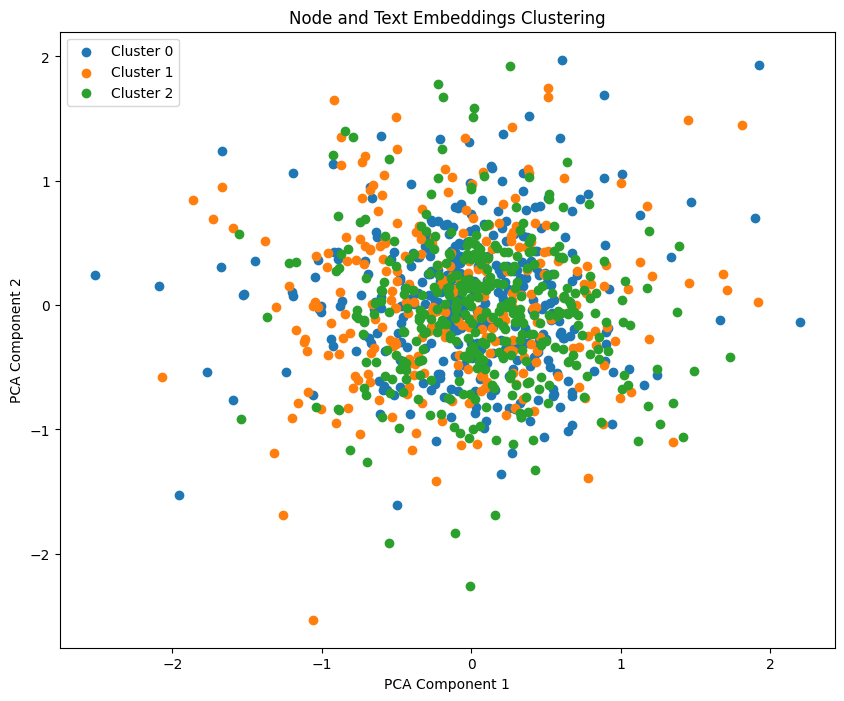

In [24]:
import os
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Limit the number of threads used by multithreading libraries for optimization
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

def load_embeddings_and_text(vec_file_path):
    """Load node embeddings and discrete text data"""
    with open(vec_file_path, 'r') as f:
        lines = f.readlines()
    
    node_embeddings = {}
    text_data = {}
    for line in lines[1:]: 
        parts = line.strip().split()
        node_id = parts[0]
        try:
            embedding = np.array([float(x) for x in parts[1:]])
            node_embeddings[node_id] = embedding
        except ValueError:
            text_data[node_id] = " ".join(parts[1:])
    return node_embeddings, text_data

def generate_embeddings(text_data, embedding_dim=50):
    # Map text categories to integers
    label_encoder = LabelEncoder()
    text_ids = list(text_data.keys())
    text_corpus = list(text_data.values())
    text_labels = label_encoder.fit_transform(text_corpus)
    
    # Generate random embeddings for each category
    unique_categories = len(label_encoder.classes_)
    embedding_matrix = np.random.rand(unique_categories, embedding_dim)
    
    # Map each text to its corresponding embedding vector
    text_embeddings = np.array([embedding_matrix[label] for label in text_labels])
    return text_ids, text_embeddings

def combine_embeddings_optimized(node_embeddings, text_ids, text_vectors, text_vector_dim):
    embeddings = []
    numeric_dim = len(next(iter(node_embeddings.values()))) if node_embeddings else 0
    max_num_dims = numeric_dim + text_vector_dim

    for node_id, numeric_embedding in node_embeddings.items():
        try:
            if text_vectors is not None and node_id in text_ids:
                text_index = text_ids.index(node_id)
                text_embedding = text_vectors[text_index]
                combined = np.concatenate([numeric_embedding, text_embedding])
            else:
                combined = np.concatenate([numeric_embedding, np.zeros(max_num_dims - numeric_dim)])
            embeddings.append(combined)
        except Exception as e:
            print(f"Error processing node {node_id}: {e}")
            continue

    max_len = max(len(emb) for emb in embeddings)
    embeddings = [np.pad(emb, (0, max_len - len(emb))) for emb in embeddings]
    
    return np.array(embeddings)

def cluster_embeddings(embeddings, num_clusters):
    clustering = AgglomerativeClustering(n_clusters=num_clusters)
    cluster_labels = clustering.fit_predict(embeddings)
    return cluster_labels

def visualize_clusters(embeddings, cluster_labels):
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)
    
    plt.figure(figsize=(10, 8))
    for cluster_id in np.unique(cluster_labels):
        cluster_points = reduced_embeddings[cluster_labels == cluster_id]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id}")
    
    plt.title("Node and Text Embeddings Clustering")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    vec_file_path = 'node2vec_embeddings.vec'

    print("Loading node embeddings and text data...")
    node_embeddings, text_data = load_embeddings_and_text(vec_file_path)

    print("Generating embeddings for text data...")
    if text_data:
        text_ids, text_vectors = generate_embeddings(text_data, embedding_dim=50)
    else:
        text_ids, text_vectors = [], None

    print("Combining node and text embeddings...")
    combined_embeddings = combine_embeddings_optimized(node_embeddings, text_ids, text_vectors, text_vector_dim=50)

    print("Clustering embeddings...")
    num_clusters = 3
    cluster_labels = cluster_embeddings(combined_embeddings, num_clusters)

    print("Visualizing clusters...")
    visualize_clusters(combined_embeddings, cluster_labels)


In [27]:
import numpy as np
import rdflib
from pykeen.pipeline import pipeline
from pykeen.triples import TriplesFactory
import torch
from sklearn.model_selection import train_test_split

def load_rdf_as_triples(rdf_file_path):
    rdf_graph = rdflib.Graph()
    rdf_graph.parse(rdf_file_path, format="turtle") 
    triples = [(str(subj), str(pred), str(obj)) for subj, pred, obj in rdf_graph]
    return triples

def train_transe_model_from_rdf_optimized(triples, output_path, num_epochs=10, embedding_dim=50, batch_size=1024):
    triples_array = np.array(triples, dtype=str)
    triples_factory = TriplesFactory.from_labeled_triples(triples=triples_array)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    train_triples_array, test_triples_array = train_test_split(triples_array, test_size=0.01, random_state=42)
    train_triples_factory = TriplesFactory.from_labeled_triples(triples=train_triples_array)
    test_triples_factory = TriplesFactory.from_labeled_triples(triples=test_triples_array)

    result = pipeline(
        training=train_triples_factory,
        testing=test_triples_factory,
        validation=None,
        model="TransE",
        model_kwargs=dict(embedding_dim=embedding_dim),
        training_kwargs=dict(num_epochs=num_epochs, batch_size=batch_size),
        device=device,
    )

    result.save_to_directory(output_path)

    return result, train_triples_factory
def predict_top_books(user_id, triples_factory, model_result, top_n=5):

    trained_model = model_result.model
    entity_to_id = triples_factory.entity_to_id
    id_to_entity = {v: k for k, v in entity_to_id.items()}

    if user_id not in entity_to_id:
        raise ValueError(f"USER-ID {user_id} does not exist")

    user_embedding = trained_model.entity_representations[0](torch.tensor([entity_to_id[user_id]]))

    all_entities = list(entity_to_id.keys())
    similarities = []
    for entity in all_entities:
        if entity.startswith("Book-Title"):
            entity_embedding = trained_model.entity_representations[0](torch.tensor([entity_to_id[entity]]))
            similarity = -np.linalg.norm(user_embedding.detach().numpy() - entity_embedding.detach().numpy())
            similarities.append((entity, similarity))

    similarities.sort(key=lambda x: x[1], reverse=True)
    top_books = [entity for entity, _ in similarities[:top_n]]
    return [id_to_entity[book] for book in top_books]

In [8]:
import torch
rdf_file_path = "ratings.ttl"
triples = load_rdf_as_triples(rdf_file_path)

In [28]:
if __name__ == "__main__":
    device = "cuda" if torch.cuda.is_available() else "cpu"

    transe_output_path = "transe_model_output" 
    user_id = "108759" 
    top_n = 5

    transe_result, trained_triples_factory = train_transe_model_from_rdf_optimized(
        triples, transe_output_path, num_epochs=1 #Change here to use more epochs
    )

Using device: cuda


INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/1 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/4386 [00:00<?, ?batch/s]

Evaluating on cuda:0:   0%|          | 0.00/45.4k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 145.81s seconds
INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=1562946, num_relations=6, create_inverse_triples=False, num_triples=4490746) to file:///autodl-fs/data/transe_model_output/training_triples
INFO:pykeen.pipeline.api:Saved to directory: /autodl-fs/data/transe_model_output


In [35]:
import numpy as np
from pykeen.triples import TriplesFactory
import torch
import os

def load_transe_model(model_directory):
    model_path = os.path.join(model_directory, "trained_model.pkl")
    model = torch.load(model_path, map_location=torch.device('cpu'))
    return model

def predict_top_books(user_id, triples_factory, model, top_n=5):
    print(f"Predicting top books for user: {user_id}")
    entity_embeddings = model.entity_representations[0]
    all_entities = list(triples_factory.entity_to_id.keys())
    
    if user_id not in triples_factory.entity_to_id:
        raise ValueError(f"User ID {user_id} not found in the entity set!")
    
    user_idx = triples_factory.entity_to_id[user_id]
    user_embedding = entity_embeddings(torch.tensor(user_idx)).detach().numpy()
    
    similarities = []
    for entity in all_entities:
        if "book" in entity:  # Ensure only books are considered
            entity_idx = triples_factory.entity_to_id[entity]
            entity_embedding = entity_embeddings(torch.tensor(entity_idx)).detach().numpy()
            similarity = -((user_embedding - entity_embedding) ** 2).sum()
            similarities.append((entity, similarity))
    
    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
    return [entity for entity, _ in similarities[:top_n]]

# Main script
if __name__ == "__main__":
    model_path = "transe_model_output"  # Directory containing the trained model
    
    # Assume `triples` is already loaded
    print("Converting triples to a triples factory...")
    triples_array = np.array([[s, p, o] for s, p, o in triples], dtype=str)
    triples_factory = TriplesFactory.from_labeled_triples(triples=triples_array)
    
    # Load the pre-trained TransE model
    print("Loading pre-trained TransE model...")
    transe_model = load_transe_model(model_path)
    
    # Predict for a specific user
    user_id = "http://example.org/user_100004"
    top_n = 5
    recommended_books = predict_top_books(user_id, triples_factory, transe_model, top_n=top_n)
    
    print(f"Top {top_n} recommended books for user {user_id}:")
    for idx, book in enumerate(recommended_books, 1):
        print(f"{idx}. {book}")

Converting triples to a triples factory...
Loading pre-trained TransE model...


/tmp/ipykernel_1173/678276059.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_location=torch.device('cpu'))


Predicting top 5 books for user http://example.org/user_100004...
Predicting top books for user: http://example.org/user_100004
Top 5 recommended books for user http://example.org/user_100004:
1. http://example.org/book_037540600X
2. http://example.org/book_0801978246
3. http://example.org/book_3827311454
4. http://example.org/book_9879423224
5. http://example.org/book_0760704546
